In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import tree


In [2]:
df=pd.read_csv("train (1).csv")

In [3]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df = df.drop(['Age','Embarked','Name','Ticket','Cabin'],1)

C:\Users\chetan\AppData\Local\Temp/ipykernel_8232/683085114.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(['Age','Embarked','Name','Ticket','Cabin'],1)


In [5]:
df

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare
0,1,0,3,male,1,0,7.2500
1,2,1,1,female,1,0,71.2833
2,3,1,3,female,0,0,7.9250
3,4,1,1,female,1,0,53.1000
4,5,0,3,male,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,male,0,0,13.0000
887,888,1,1,female,0,0,30.0000
888,889,0,3,female,1,2,23.4500
889,890,1,1,male,0,0,30.0000


In [6]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df = df.drop_duplicates()

In [9]:
df.duplicated().sum()

0

In [10]:
df['Sex'].replace(['male','female'],[0,1],inplace=True)

In [11]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [12]:
df=df.drop('Pclass',1)

C:\Users\chetan\AppData\Local\Temp/ipykernel_8232/2321591964.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df=df.drop('Pclass',1)


In [13]:
x=df.drop('Survived',1)

C:\Users\chetan\AppData\Local\Temp/ipykernel_8232/112319477.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x=df.drop('Survived',1)


In [14]:
x

,PassengerId,Sex,SibSp,Parch,Fare
0,1,0,1,0,7.2500
1,2,1,1,0,71.2833
2,3,1,0,0,7.9250
3,4,1,1,0,53.1000
4,5,0,0,0,8.0500
...,...,...,...,...,...
886,887,0,0,0,13.0000
887,888,1,0,0,30.0000
888,889,1,1,2,23.4500
889,890,0,0,0,30.0000


In [15]:
df

,PassengerId,Survived,Sex,SibSp,Parch,Fare
0,1,0,0,1,0,7.2500
1,2,1,1,1,0,71.2833
2,3,1,1,0,0,7.9250
3,4,1,1,1,0,53.1000
4,5,0,0,0,0,8.0500
...,...,...,...,...,...,...
886,887,0,0,0,0,13.0000
887,888,1,1,0,0,30.0000
888,889,0,1,1,2,23.4500
889,890,1,0,0,0,30.0000


In [16]:
y=df.Survived

In [17]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [19]:
from sklearn import tree

In [20]:
classifier = tree.DecisionTreeClassifier(max_depth=3)

In [21]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

[Text(418.5, 475.65000000000003, 'X[1] <= 0.5\ngini = 0.471\nsamples = 712\nvalue = [441, 271]'),
 Text(209.25, 339.75, 'X[4] <= 26.144\ngini = 0.302\nsamples = 458\nvalue = [373, 85]'),
 Text(104.625, 203.85000000000002, 'X[3] <= 0.5\ngini = 0.224\nsamples = 335\nvalue = [292, 43]'),
 Text(52.3125, 67.94999999999999, 'gini = 0.19\nsamples = 310\nvalue = [277, 33]'),
 Text(156.9375, 67.94999999999999, 'gini = 0.48\nsamples = 25\nvalue = [15, 10]'),
 Text(313.875, 203.85000000000002, 'X[0] <= 501.0\ngini = 0.45\nsamples = 123\nvalue = [81, 42]'),
 Text(261.5625, 67.94999999999999, 'gini = 0.339\nsamples = 74\nvalue = [58, 16]'),
 Text(366.1875, 67.94999999999999, 'gini = 0.498\nsamples = 49\nvalue = [23, 26]'),
 Text(627.75, 339.75, 'X[2] <= 2.5\ngini = 0.392\nsamples = 254\nvalue = [68, 186]'),
 Text(523.125, 203.85000000000002, 'X[4] <= 48.202\ngini = 0.351\nsamples = 233\nvalue = [53, 180]'),
 Text(470.8125, 67.94999999999999, 'gini = 0.423\nsamples = 168\nvalue = [51, 117]'),
 Text(

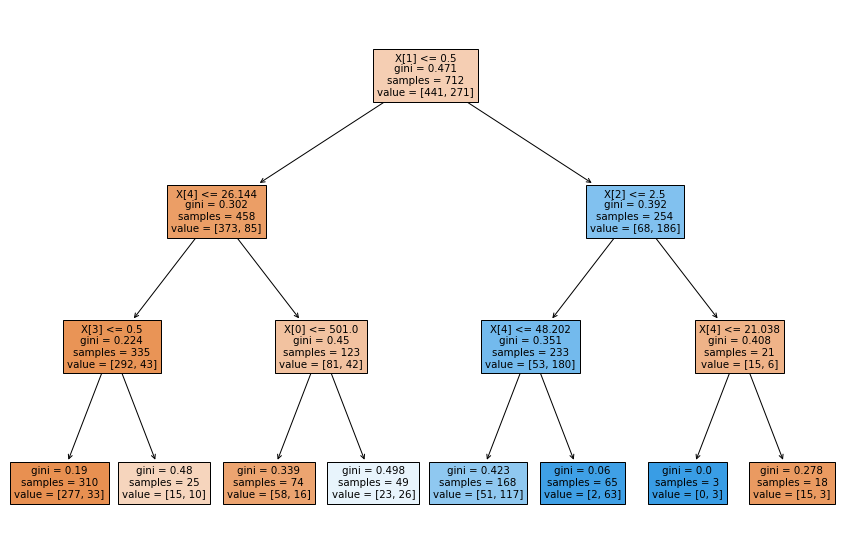

In [22]:
plt.figure(figsize=(15,10))
tree.plot_tree(classifier ,filled=True)

In [23]:
classifier.score(x_test,y_test)

0.7486033519553073

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
model= LogisticRegression()

In [26]:
model.fit(x_train,y_train)


C:\Users\chetan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
model.score(x_test,y_test)

0.7932960893854749